#**Maestría en Analítica de Negocios**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

####**Filtrado de datos (data leakage) / Pipeline / Curvas de Aprendizaje**

In [1]:
# Librerías básicas que estaremos requiriendo en la mayoría de las actividades. 
# Recuerda usar el # para documentar tu código dentro de estas celdas de Código.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns   # para un mejor despliegue de los gráficos

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Queremos accesar el archivo que está en la carpeta "sample_data" en la cual nos encontramos de manera  
# predeterminada y que podemos verificar con el siguiente comando que nos permite listar sus archivos
# y directorios:

!ls

sample_data


In [3]:
# La siguiente instrucción nos permite adentrarnos en dicha carpeta y de nuevo listamos lo que hay dentro de ella:

%cd sample_data/

!ls

/content/sample_data
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [4]:
# En particular, los datos para el entrenamiento los encontramos obviamente en el siguiente archivo, el cual procedemos a cargar: 

data = pd.read_csv("california_housing_train.csv", sep=",")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


De cualquier de las ligas dadas anteriormente, sabemos que la variable de salida es el precio medio (mediana) de la casa en dólares estadounidenses, "median_house_value".

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [6]:
sns.set(rc={'figure.figsize':(12,10)})   # (ancho-columnas, altura-renglones) Ajustemos el tamaño de la ventana 
                                         # que desplegará los gráficos usando la librería de seaborn (sns).

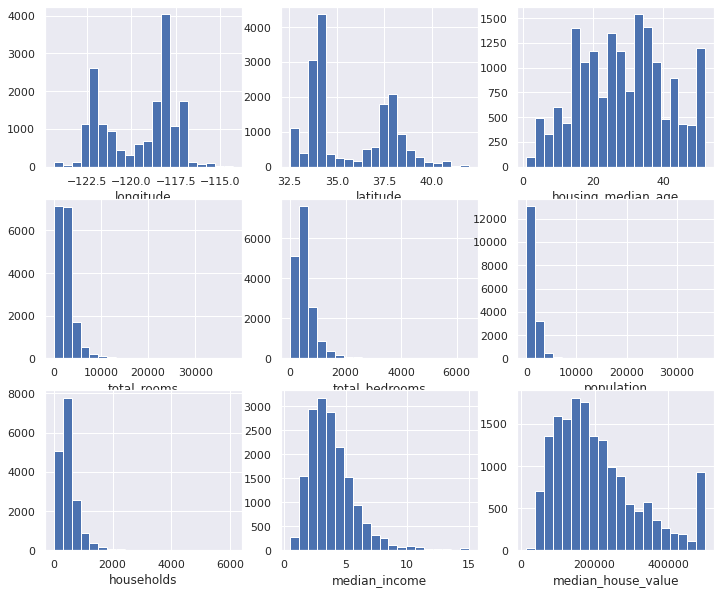

In [7]:
fig, axes = plt.subplots(3, 3)    # definimos una ventana de 3x3 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,9):
  plt.subplot(3,3,k+1)     # los nichos para cada histograma se numeran iniciando en 1 y no en 0.
  plt.hist(data[data.columns[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(data.columns[k])
plt.show()

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Puedes nuevamente observar de esta tabla varias de las características que mencionamos previamente a partir de los histogramas.

In [9]:
X1 =data[['total_bedrooms']]
yy = data[['median_house_value']]

In [10]:
sns.set(rc={'figure.figsize':(6,4)})

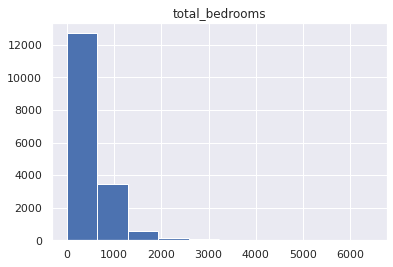

In [30]:
X1.hist();

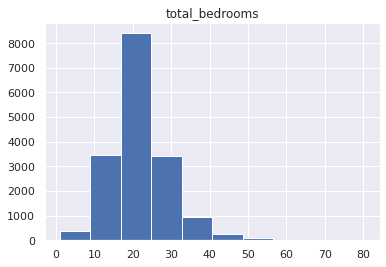

In [28]:
np.sqrt(X1).hist();

#**Modelo-1**

In [12]:
m = LinearRegression()

fit1 = m.fit(X1, yy)

preds1 = fit1.predict(X1)

preds1 = np.sqrt(mean_squared_error(yy, preds1))

print("RMSE: %.2f" % (preds1))

RMSE: 115858.74


No considera la particióin Train/Val/Test

In [29]:
X1.shape

(17000, 1)

###**¿Cuál es el error de diseño de este modelo, en caso de que exista, de acuerdo a la metodología de aprendizaje automático (machine learning)?**

#**Modelo-2**

In [13]:
m = LinearRegression()

X2 = np.sqrt(X1)

fit2 = m.fit(X2, yy)

preds2 = fit2.predict(X2)

preds2 = np.sqrt(mean_squared_error(yy, preds2))

print("RMSE: %.2f" % (preds2))

RMSE: 115824.92


###**¿Cuál es el error de diseño de este modelo, en caso de que exista, de acuerdo a la metodología de aprendizaje automático (machine learning)?**

#**Modelo-3**

In [14]:
semilla = 11
val_size = 0.2

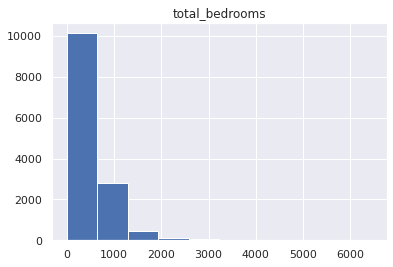

In [31]:
X_train.hist();

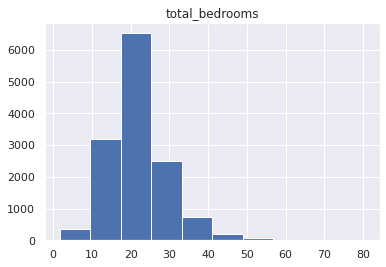

In [32]:
np.sqrt(X_train).hist();

In [15]:
X2 = np.sqrt(X1)    xxxxxxxxx

X_train, X_val, y_train, y_val = train_test_split(X2, yy, test_size=val_size, random_state=semilla)



m = LinearRegression()

fit3 = m.fit(X_train, y_train)

preds3 = fit3.predict(X_val)

preds3 = np.sqrt(mean_squared_error(y_val, preds3))

print("RMSE: %.2f" % (preds3))

RMSE: 114709.53


###**¿Cuál es el error de diseño de este modelo, en caso de que exista, de acuerdo a la metodología de aprendizaje automático (machine learning)?**

###NOTA: Observa que al particionar el conjunto original de train en 80% y 20%, ya tenemos ahora el conjunto de entrenamiento y el de validación. El archivo restante que se encuentra en la carpeta del Google-Colab, llamado "california_housing_test.csv", será el conjunto de prueba, completando lo tres conjuntos con los cuales estaremos trabajando.

#**Modelo-4**

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X1, yy, test_size=val_size, random_state=semilla)

X4_train = np.sqrt(X_train)   # siempre y cuando la decisión de sacar la raíz se tomó con el conjunto X_train solamente

X4_val = np.sqrt(X_val)


m = LinearRegression()

fit4 = m.fit(X4_train, y_train)

preds4 = fit4.predict(X4_val)

preds4 = np.sqrt(mean_squared_error(y_val, preds4))

print("RMSE: %.2f" % (preds4))

RMSE: 114709.53


###**¿Cuál es el error de diseño de este modelo, en caso de que exista, de acuerdo a la metodología de aprendizaje automático (machine learning)?**

#**Modelo-5**

In [17]:
# Supongamos que también deseamos escalar los datos mediante la transformación (x-miu)/std

from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X1, yy, test_size=.2, random_state=semilla)

 #### Pre-procesamiento ....
X5_train = np.sqrt(X_train)

X5_train = (X5_train - np.mean(X5_train)) / np.std(X5_train)

X5_val = np.sqrt(X_val)
#X5_val = (X5_val - np.mean(X5_val)) / np.std(X5_val)     xxxxxxxxx
X5_val = (X5_val - np.mean(X5_train)) / np.std(X5_train)  

# termina el preprocesamiento ....

# Ahora sí entrenamos el modelo:

m = LinearRegression()

fit5 = m.fit(X5_train, y_train)

preds5 = fit5.predict(X5_val)

preds5 = np.sqrt(mean_squared_error(y_val, preds5))

print("RMSE: %.2f" % (preds5))

RMSE: 177523.31


###**¿Cuál es el error de diseño de este modelo, en caso de que exista, de acuerdo a la metodología de aprendizaje automático (machine learning)?**

#**Modelo-6: Usando Pipelines para evitar el filtrado de información (data leakage)**




###Veamos a continuación la manera correcta de llevar a cabo las transformaciones mediante el uso de la clase Pipeline de scikit-learn. La clase Pipeline nos permitirá encapsular una serie de transformaciones para llevar a cabo el entrenamiento de un modelo, apoyando a evitar el filtrado de información.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer   
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X1, yy, test_size=val_size, random_state=semilla)

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('sqrt', FunctionTransformer(np.sqrt)),                                 
                                 ('escalaNum', StandardScaler())])   

num_pipeline_nombres = ['total_bedrooms']


# Aplicamos dichas transformaciones a las variables indicadas y el resto las dejamos igual:
columnasTransformer = ColumnTransformer(transformers = [('vars_num_pipeline', num_pipeline, num_pipeline_nombres)
                                                        ],
                                        remainder='passthrough')


m = LinearRegression()

# Aplicamos las transformaciones al conjunto de entrenamiento:
XtrainFit = columnasTransformer.fit(X_train)   # Generamos la información necesaria con el conjunto de entrenamiento
                                               # para evitar el filtrado de información.

XtrainTransf = XtrainFit.transform(X_train)    # y ahora aplicamos dichas transformaciones al conjunto de entrenamiento,
XvalTransf  =  XtrainFit.transform(X_val)      # y también al conjunto de validación (con la información de los datos de Train).


fit6 = m.fit(XtrainTransf, y_train)

preds6 = fit6.predict(XvalTransf)

preds6 = np.sqrt(mean_squared_error(y_val, preds6))

print("RMSE: %.2f" % (preds6))

RMSE: 114709.53


#**Curvas de Aprendizaje**

In [21]:
from sklearn.model_selection import learning_curve

from sklearn.model_selection import RepeatedKFold

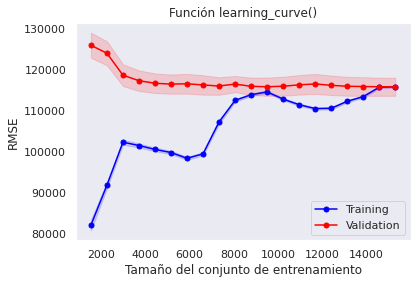

In [22]:
modeloLC = LinearRegression()

XtvTransf = XtrainFit.transform(X1)   # Como usaremos Cross-Validation, usamos el conjunto original de Train, X1 y sus valores reales yy.

delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedKFold(n_splits=10, n_repeats=5, random_state=semilla)

train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloLC, 
                                                        X=XtvTransf, 
                                                        y=yy,
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring='neg_root_mean_squared_error')



# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='red')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()

###NOTA: En el caso de scikit-learn, recuerda que calcula el valor negativo de RMSE.

### Consulta la documentación correspondiente:

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


#**Modelo final con el conjunto de Prueba (Test)**

In [23]:
datatest = pd.read_csv("california_housing_test.csv", sep=",")   # cargamos los datos de la carpeta del Google-Colab, observa que
                                                                 # hasta este momento no se habían usado estos datos.
datatest.shape

(3000, 9)

In [24]:
Xtest =datatest[['total_bedrooms']]
ytest = datatest[['median_house_value']]

In [25]:
mf = LinearRegression()

XtvTransf = XtrainFit.transform(X1)   # Observa que al obtener el entrenamiento final, usamos los datos tanto de Train como de Validation X1,
                                      # esto permitirá todavía usar una mayor cantidad de información para aprender mejor. Sin embargo,
                                      # seguimos usando la información solo del conjunto Train para evitar el filtrado de información.

XtestTransf  =  XtrainFit.transform(Xtest)  

fitf = mf.fit(XtvTransf, yy)

predsf = fitf.predict(XtestTransf)
predsf = np.sqrt(mean_squared_error(ytest, predsf))

print("RMSE: %.2f" % (predsf))

RMSE: 112733.28


In [26]:
print("\tModelo1\t\tModelo2\t\tModelo3\t\tModelo4\t\tModelo5\t\tModelo6\t\tModeloF")

print("RMSE:  %.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t" % (preds1,preds2,preds3,preds4,preds5,preds6,predsf) )



	Modelo1		Modelo2		Modelo3		Modelo4		Modelo5		Modelo6		ModeloF
RMSE:  115858.74	115824.92	114709.53	114709.53	114708.73	114709.53	112733.28	


###Conclusiones ...